In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report,precision_score,f1_score,recall_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Downloads/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
(df.isnull().sum()/len(df))*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
'''def outlier_func(df,*col):
    for i in col:
        Q1,Q3 = np.percentile(df[i],[25,75])   
        IQR = Q3-Q1                              # getting IQR 
        LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
        UpperRange = Q3+(1.5 * IQR)
        index_del=df[(df[i]<LowerRange) | (df[i]>UpperRange)].index
        df.drop(index_del,inplace=True)
    return df'''

'def outlier_func(df,*col):\n    for i in col:\n        Q1,Q3 = np.percentile(df[i],[25,75])   \n        IQR = Q3-Q1                              # getting IQR \n        LowerRange = Q1-(1.5 * IQR)              # getting Lowrange\n        UpperRange = Q3+(1.5 * IQR)\n        index_del=df[(df[i]<LowerRange) | (df[i]>UpperRange)].index\n        df.drop(index_del,inplace=True)\n    return df'

In [9]:
norm=MinMaxScaler()

In [10]:
type(df[['BloodPressure']])

pandas.core.frame.DataFrame

In [11]:
for i in df.columns:
    df[[i]]=norm.fit_transform(df[[i]])

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [13]:
def ZRscore_outlier(col,dataframe):
    out = []
    med = np.median(col)
    ma = stats.median_abs_deviation(col)
    for i in col: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    print("number of outliers:", len(out))

In [14]:
for i in df.drop('Outcome',axis=1):
    print('\n')
    print(i+':')
    ZRscore_outlier(df[i],df)



Pregnancies:
Outliers: [0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.8823529411764706, 1.0, 0.7058823529411764, 0.7058823529411764, 0.7647058823529411, 0.8235294117647058, 0.7647058823529411, 0.7058823529411764, 0.7647058823529411, 0.7058823529411764, 0.7058823529411764, 0.7058823529411764, 0.8235294117647058, 0.7058823529411764, 0.7647058823529411, 0.7058823529411764, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7058823529411764]
number of outliers: 23


Glucose:
Outliers: [0.0, 0.0, 0.0, 0.0, 0.0]
number of outliers: 5


BloodPressure:
Outliers: [0.0, 0.0, 0.24590163934426232, 0.9016393442622951, 0.0, 0.0, 0.0, 0.0, 0.8852459016393444, 1.0, 0.24590163934426232, 0.0, 0.9016393442622951, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8852459016393444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9016393442622951, 0.0, 0.19672131147540983, 0.0, 0.0, 0.0, 0.0, 0.9344262295081968, 0.0, 0.0, 0.0]
number of outliers: 45


SkinThickness:
Outlie

In [15]:
#df.drop(df[df["Glucose"]==0.0].index,axis=0,inplace=True)

In [16]:
df.shape

(768, 9)

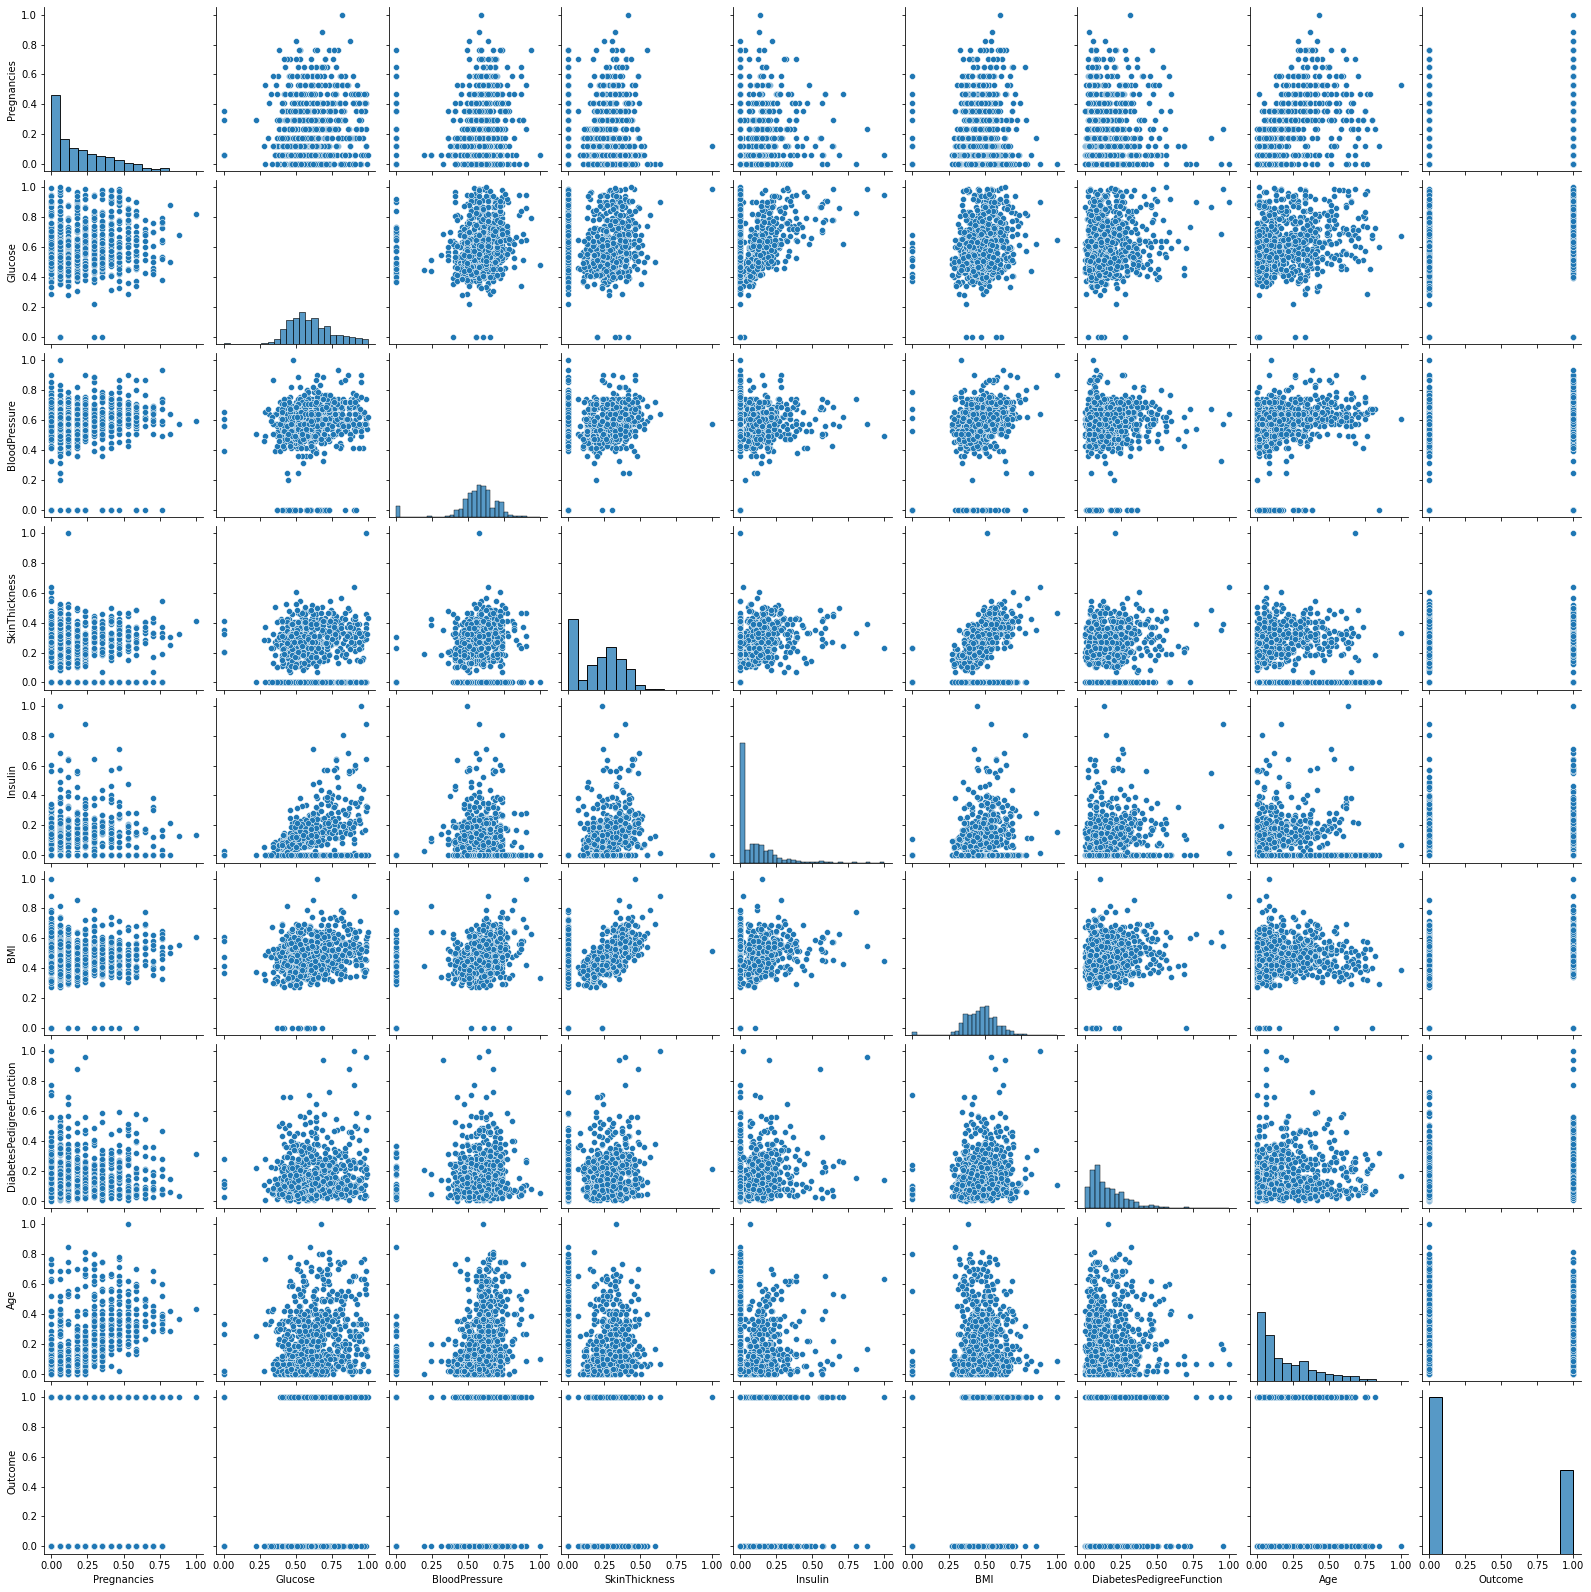

In [17]:
sns.pairplot(df)

/Users/pushkarsawant/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

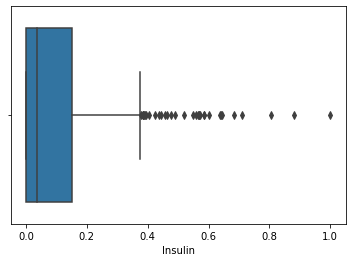

In [18]:
sns.boxplot(df['Insulin'])

In [19]:
#df.drop(df[df["SkinThickness"]==1.0].index,axis=0,inplace=True)

In [20]:
bmi_outlier=[0.0, 0.0, 0.0, 0.0, 0.7928464977645306, 0.8196721311475411, 0.0, 1.0, 0.7883755588673622, 0.0, 0.0, 0.8852459016393444, 0.0, 0.0, 0.8539493293591655, 0.0, 0.0]
#for i in bmi_outlier:
df.drop(df[df['BMI'].isin(bmi_outlier)].index,inplace=True)

In [21]:
df.shape

(751, 9)

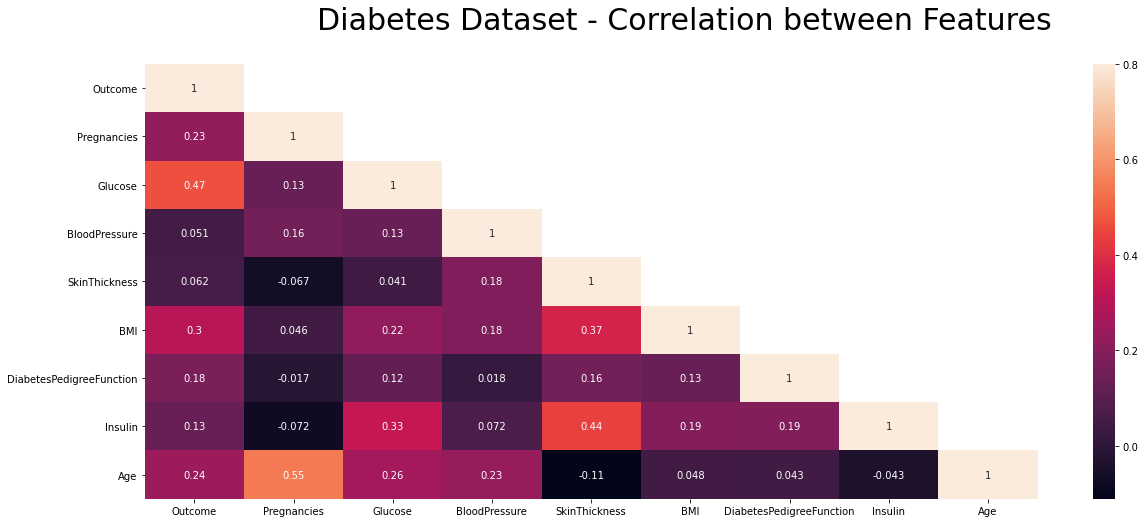

In [22]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Diabetes Dataset - Correlation between Features", fontsize=30)
corrcoef = df[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'Age']].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

In [23]:
def ZRscore_outlier(df):
    out = []
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    print("number of outliers:", len(out))

In [24]:
#model_nb = GaussianNB(var_smoothing=0.001)
#model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
#model_svc = SVC(kernel="linear")

In [25]:
df.shape

(751, 9)

In [26]:
def get_results(train_x, train_y, test_x, test_y, classifiers): 
    names = []
    accuracy_list = [] 
    precision_list = []
    recall_list = [] 
    f1_list = []
    classifiers.fit(train_x, train_y)
    y_preds = classifiers.predict(test_x) 
        
    accuracy = round(classifiers.score(test_x, test_y), 3) 
    precision = round(precision_score(y_test, y_preds), 3)
    recall = round(recall_score(y_test, y_preds), 3)
    f1 = round(f1_score(y_test, y_preds), 3)
        
    names.append(classifiers.__class__.__name__)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    results = {'Model': names, 
               'Accuracy': accuracy_list, 
               'Precision': precision_list, 
               'Recall': recall_list, 
               'F1': f1_list}
    
    resultsDF = pd.DataFrame.from_dict(results)
    
    return resultsDF

In [27]:
df['BMI'].isin([0.0, 0.0, 0.0, 0.0, 0.7928464977645306, 0.8196721311475411, 0.0, 1.0, 0.7883755588673622, 0.0, 0.0, 0.8852459016393444, 0.0, 0.0, 0.8539493293591655, 0.0, 0.0]).value_counts()

False    751
Name: BMI, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Outcome'],axis=1),df['Outcome'],test_size=0.2,random_state=101)

In [29]:
get_results(x_train,y_train,x_test,y_test,model_dt)

,Model,Accuracy,Precision,Recall,F1
0,DecisionTreeClassifier,0.728,0.592,0.818,0.687


In [30]:
y_pred=model_dt.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)#,mean_squared_error,confusion_matrix,classification_report

0.7284768211920529

In [32]:
mean_squared_error(y_test,y_pred)

0.271523178807947

In [33]:
confusion_matrix(y_test,y_pred)

array([[65, 31],
       [10, 45]])

<Figure size 2000x2000 with 0 Axes>

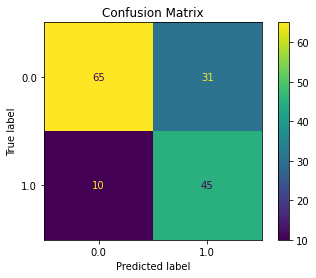

In [41]:
plt.figure(figsize=(10,10),dpi=200)
plot_confusion_matrix(model_dt,x_test,y_test)
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76        96
         1.0       0.59      0.82      0.69        55

    accuracy                           0.73       151
   macro avg       0.73      0.75      0.72       151
weighted avg       0.77      0.73      0.73       151

